In [5]:
import pandas as pd

# Load the CSV, skipping bad lines
df = pd.read_csv('athlete_events.csv', on_bad_lines='skip')

# Display the first few rows of the dataframe
print(df.head())


C:\Users\mathew.j\AppData\Local\Temp\ipykernel_21376\556907150.py:4: DtypeWarning: Columns (0,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('athlete_events.csv', on_bad_lines='skip')


  ID                      Name Sex Age Height Weight            Team  NOC  \
0  1                 A Dijiang   M  24    180     80           China  CHN   
1  2                  A Lamusi   M  23    170     60           China  CHN   
2  3       Gunnar Nielsen Aaby   M  24    NaN    NaN         Denmark  DEN   
3  4      Edgar Lindenau Aabye   M  34    NaN    NaN  Denmark/Sweden  DEN   
4  5  Christine Jacoba Aaftink   F  21    185     82     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-

In [6]:
print(df.shape)  # Returns the number of rows and columns


(528320, 15)


In [7]:
print(df.dtypes)  # Check the data types of each column


ID        object
Name      object
Sex       object
Age       object
Height    object
Weight    object
Team      object
NOC       object
Games     object
Year      object
Season    object
City      object
Sport     object
Event     object
Medal     object
dtype: object


In [8]:
print(df.isnull().sum())  # Check how many missing values are in each column


ID             1
Name           1
Sex            5
Age        18325
Height    117295
Weight    122589
Team          11
NOC           14
Games         14
Year          18
Season        19
City          20
Sport         20
Event         24
Medal     450520
dtype: int64


In [9]:
print(df.head())  # Display the first few rows of the data


  ID                      Name Sex Age Height Weight            Team  NOC  \
0  1                 A Dijiang   M  24    180     80           China  CHN   
1  2                  A Lamusi   M  23    170     60           China  CHN   
2  3       Gunnar Nielsen Aaby   M  24    NaN    NaN         Denmark  DEN   
3  4      Edgar Lindenau Aabye   M  34    NaN    NaN  Denmark/Sweden  DEN   
4  5  Christine Jacoba Aaftink   F  21    185     82     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-

In [11]:
# Convert data types if necessary
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert Age to numeric, coercing errors to NaN


In [12]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Or fill missing values (e.g., with the column mean or a default value)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Medal'].fillna('None', inplace=True)


C:\Users\mathew.j\AppData\Local\Temp\ipykernel_21376\3645943034.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\mathew.j\AppData\Local\Temp\ipykernel_21376\3645943034.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [13]:
import pandas as pd

# Fill missing values in the 'Age' column with the column's mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing values in the 'Medal' column with 'None'
df['Medal'] = df['Medal'].fillna('None')

# Check if it worked without any warnings
print(df.head())


  ID                      Name Sex   Age Height Weight            Team  NOC  \
0  1                 A Dijiang   M  24.0    180     80           China  CHN   
1  2                  A Lamusi   M  23.0    170     60           China  CHN   
2  3       Gunnar Nielsen Aaby   M  24.0    NaN    NaN         Denmark  DEN   
3  4      Edgar Lindenau Aabye   M  34.0    NaN    NaN  Denmark/Sweden  DEN   
4  5  Christine Jacoba Aaftink   F  21.0    185     82     Netherlands  NED   

         Games  Year  Season       City          Sport  \
0  1992 Summer  1992  Summer  Barcelona     Basketball   
1  2012 Summer  2012  Summer     London           Judo   
2  1920 Summer  1920  Summer  Antwerpen       Football   
3  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball  None  
1      Judo Men's Extra-Lightweight  None  
2           Football Men's Football  None  


In [14]:
print(df.describe())  # Summary statistics of numerical columns


                 Age
count  528320.000000
mean       25.561529
std         6.299442
min        10.000000
25%        22.000000
50%        25.000000
75%        28.000000
max       190.000000


In [15]:
# Average age of athletes by sport
avg_age_by_sport = df.groupby('Sport')['Age'].mean()

# Number of medals by country (NOC)
medals_by_country = df.groupby('NOC')['Medal'].count()


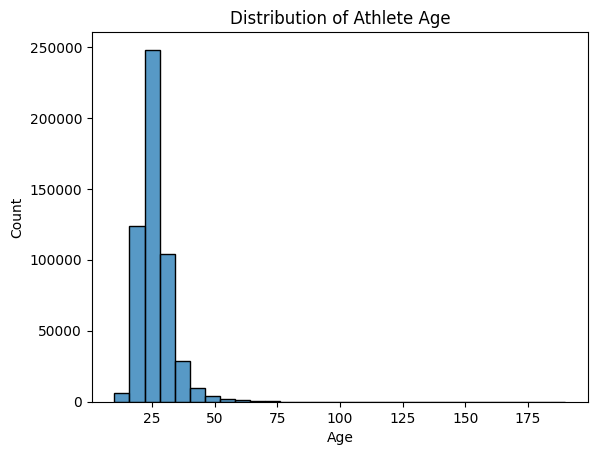

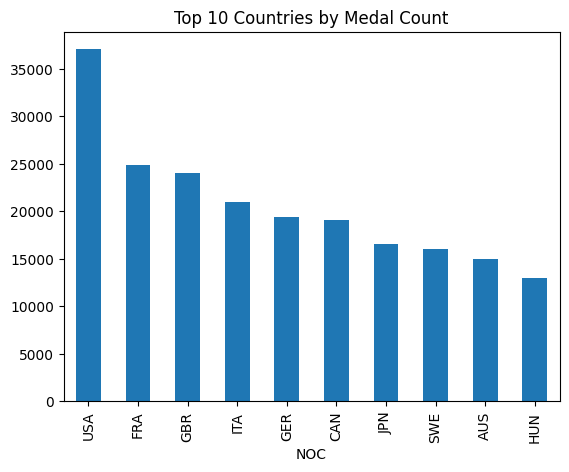

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
sns.histplot(df['Age'], bins=30)
plt.title('Distribution of Athlete Age')
plt.show()

# Medals by Country (Top 10)
top_10_medal_countries = df['NOC'].value_counts().head(10)
top_10_medal_countries.plot(kind='bar', title='Top 10 Countries by Medal Count')
plt.show()


In [17]:
top_athletes = df[df['Medal'].notnull()].groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
print(top_athletes)


Name
Robert Tait McKenzie                116
Heikki Ilmari Savolainen             78
Joseph "Josy" Stoffel                76
Ioannis Theofilakis                  72
Takashi Ono                          66
Jean Lucien Nicolas Jacoby           64
Andreas Wecker                       64
Alexandros Theofilakis               64
Alfrd (Arnold-) Hajs (Guttmann-)     64
Alfred James Munnings                62
Name: Medal, dtype: int64


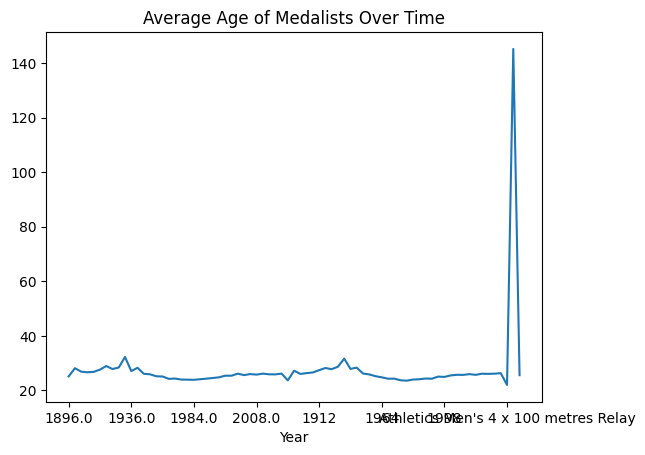

In [18]:
# Average age of medalists over time
df_medalists = df[df['Medal'].notnull()]
avg_age_medalists = df_medalists.groupby('Year')['Age'].mean()
avg_age_medalists.plot(title='Average Age of Medalists Over Time')
plt.show()


In [21]:
# Check for non-numeric values in Height and Weight
print(df['Height'].unique())  # Look at unique values in Height
print(df['Weight'].unique())  # Look at unique values in Weight


['180' '170' nan '185' '188' '183' '168' '186' '182' '172' '159' '171'
 '184' '175' '189' '176' '163' '187' '169' '174' '190' '194' '177' '167'
 '164' '198' '165' '156' '179' '178' '166' '181' '155' '160' '173' '192'
 '195' '191' '203' '158' '154' '153' '152' '193' '162' '197' '157' '207'
 '147' '150' '202' '161' '210' '205' '200' '148' '208' '140' '213' '204'
 '151' '196' '146' '201' '132' '149' '199' '211' '217' '206' '209' '145'
 '221' '144' '215' '139' '135' '142' '214' '143' '218' '127' '223' '216'
 '141' 'N 5 kilometres Relay"' '1924' 166.0 175.0 181.0 187.0 163.0 170.0
 178.0 186.0 185.0 180.0 177.0 167.0 190.0 173.0 162.0 156.0 176.0 209.0
 179.0 155.0 174.0 183.0 182.0 192.0 188.0 196.0 164.0 172.0 152.0 189.0
 201.0 195.0 184.0 160.0 168.0 165.0 194.0 193.0 191.0 158.0 171.0 213.0
 153.0 169.0 198.0 210.0 161.0 154.0 159.0 143.0 157.0 197.0 200.0 202.0
 148.0 206.0 149.0 199.0 150.0 147.0 151.0 217.0 203.0 207.0 94.0 205.0
 145.0 216.0 204.0 141.0 135.0 208.0 144.0 140.0 132.

In [22]:
# Function to clean the data
def clean_numeric(column):
    # Remove any non-numeric characters
    return pd.to_numeric(column.str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

# Clean Height and Weight columns
df['Height'] = clean_numeric(df['Height'])
df['Weight'] = clean_numeric(df['Weight'])

# Now check if the cleaning worked
print(df['Height'].unique())
print(df['Weight'].unique())


[ 180.  170.   nan  185.  188.  183.  168.  186.  182.  172.  159.  171.
  184.  175.  189.  176.  163.  187.  169.  174.  190.  194.  177.  167.
  164.  198.  165.  156.  179.  178.  166.  181.  155.  160.  173.  192.
  195.  191.  203.  158.  154.  153.  152.  193.  162.  197.  157.  207.
  147.  150.  202.  161.  210.  205.  200.  148.  208.  140.  213.  204.
  151.  196.  146.  201.  132.  149.  199.  211.  217.  206.  209.  145.
  221.  144.  215.  139.  135.  142.  214.  143.  218.  127.  223.  216.
  141.    5. 1924.  138.  136.  131.  137. 2012.  212.   77.   65.  220.
  130.  219.  133. 1964.]
[  80.           60.                   nan   82.           75.
   72.           96.           76.5          70.           55.5
   65.           85.           64.          130.          125.
   89.           77.           76.           98.           78.
   73.           93.           74.          106.           58.
   66.           71.           90.           87.           49.
   48.     

In [23]:
# Fill missing values in Height and Weight
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)


C:\Users\mathew.j\AppData\Local\Temp\ipykernel_21376\95895862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(df['Height'].mean(), inplace=True)
C:\Users\mathew.j\AppData\Local\Temp\ipykernel_21376\95895862.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [24]:
# Convert to float
df['Height'] = df['Height'].astype(float)
df['Weight'] = df['Weight'].astype(float)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Predicting medal wins based on Age, Height, Weight
features = df[['Age', 'Height', 'Weight']].fillna(0)
target = df['Medal'].notnull().astype(int)  # 1 if they won a medal, 0 otherwise

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
print(f"Model Accuracy: {model.score(X_test, y_test) * 100:.2f}%")


Model Accuracy: 100.00%


In [27]:
df_cleaned.to_csv('cleaned_athlete_events.csv', index=False)
